# <font color='blue'>Mini-Projeto 2 do curso Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Análise Exploratória em Conjunto de Dados do Kaggle usando Seaborn

Esta análise exploratória utiliza o dataset disponibilizado pelo Kaggle, o qual contém detalhes dos carros usados na Alemanha que estão à venda no ebay.
O dataset com os seus detalhes pode ser encontrado no link: https://www.kaggle.com/orgesleka/used-cars-database


In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
# Visualização dos dados
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

## Distribuição de Veículos com base no Ano de Registro

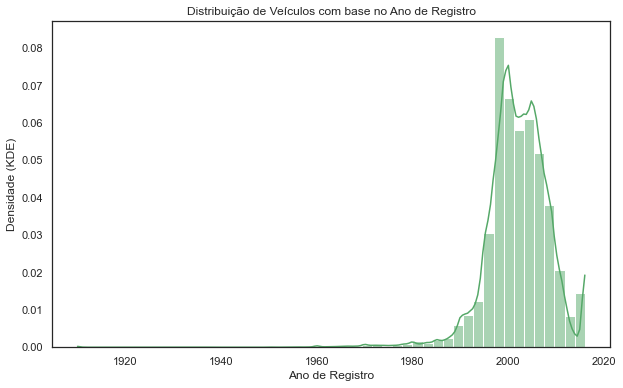

In [5]:
fig = plt.figure(figsize = (10, 6))
sns.histplot(data = df['yearOfRegistration'], stat = 'density', bins = 50, kde = True, color = 'g')
plt.xlabel('Ano de Registro')
plt.ylabel('Densidade (KDE)')
plt.title('Distribuição de Veículos com base no Ano de Registro')
plt.show()

In [6]:
# Salvando o plot
fig.savefig("plots/vehicle-distribution.png")

## Variação da faixa de preço pelo tipo de veículo

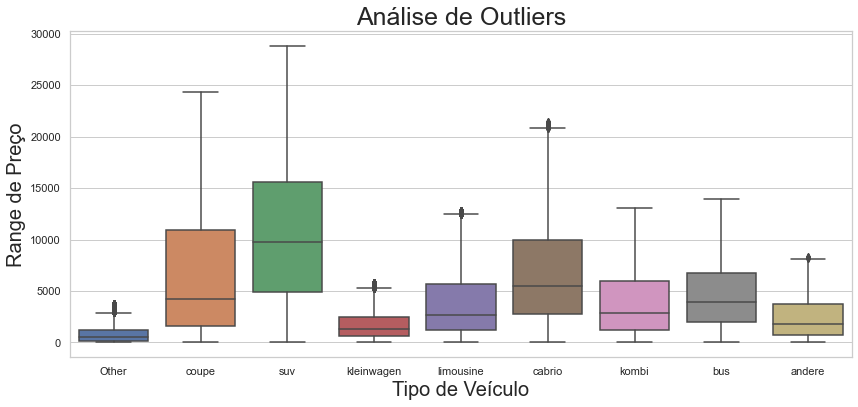

In [7]:
# Boxplot para avaliar os outliers
sns.set_theme(style = 'whitegrid')
fig = plt.figure(figsize = (14, 6))
ax = sns.boxplot(x = 'vehicleType', y = 'price', data = df)
ax.set_xlabel('Tipo de Veículo', fontsize = 20) 
ax.set_ylabel('Range de Preço', fontsize = 20)
ax.set_title('Análise de Outliers', fontsize = 25)
plt.show()

In [8]:
# Salvando o plot
fig.savefig("plots/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

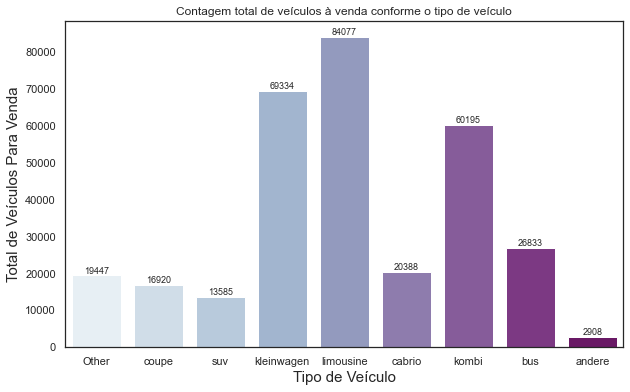

In [9]:
fig = plt.figure(figsize = (10, 6))
sns.set_theme(style = 'white')
ct = sns.countplot(x = 'vehicleType', data = df, palette = 'BuPu')
ct.set_xlabel('Tipo de Veículo', fontsize = 15)
ct.set_ylabel('Total de Veículos Para Venda', fontsize = 15)
ct.set_title('Contagem total de veículos à venda conforme o tipo de veículo')
ct.bar_label(ct.containers[0], size = 9)
plt.show()

In [10]:
# Salvando o plot
fig.savefig("plots/count-vehicleType.png")

## Número de veículos pertencentes a cada marca

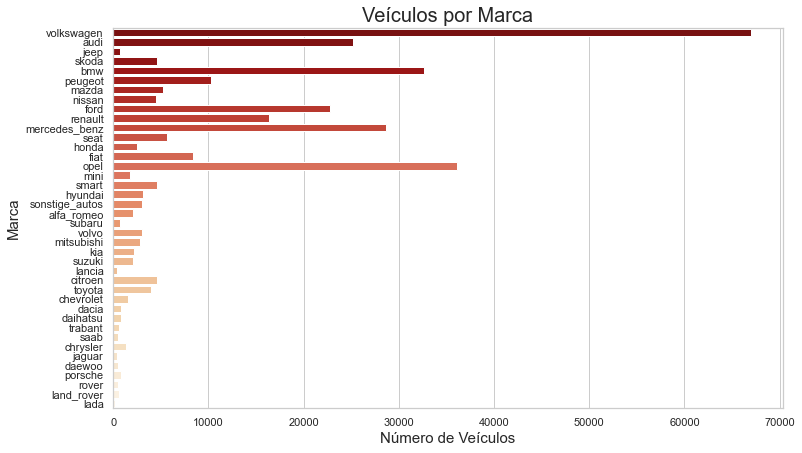

In [11]:
plt.figure(figsize = (12,7))
sns.set_theme(style = 'whitegrid')
ax = sns.countplot(y = 'brand', data = df, palette = 'OrRd_r')
ax.set_xlabel('Número de Veículos', size = 15)
ax.set_ylabel('Marca', size = 15)
ax.set_title('Veículos por Marca', size = 20)
plt.show()

In [12]:
# Salvando o plot
fig.savefig(("plots/brand-vehicleCount.png"))

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

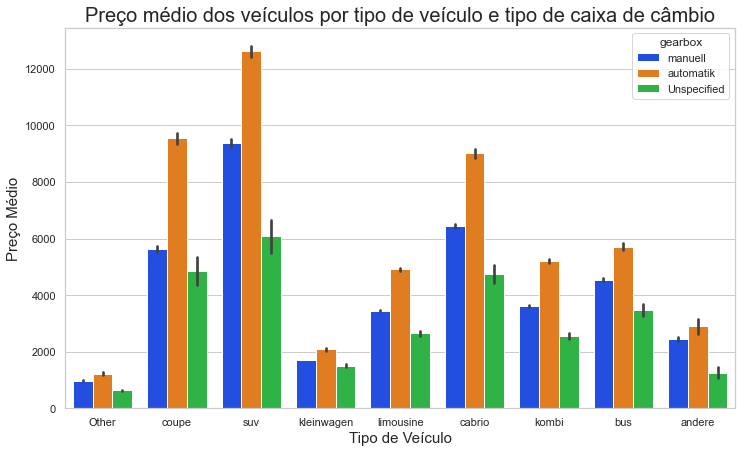

In [13]:
# Utilizando método barplot
plt.figure(figsize = (12,7))
sns.set_theme(style = 'whitegrid')
bx = sns.barplot(x = 'vehicleType', y = 'price', hue = 'gearbox', data = df, palette = 'bright')
bx.set_xlabel('Tipo de Veículo', size = 15)
bx.set_ylabel('Preço Médio', size = 15)
bx.set_title('Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio', size = 20)
plt.show()


# # Utilizando método catplot
# sns.set_theme(style = 'whitegrid')
# bx = sns.catplot(x = 'vehicleType', y = 'price', hue = 'gearbox', kind = 'bar', data = df, legend_out = False, height = 6, aspect = 1.6)
# bx.set_axis_labels('Tipo de Veículo', 'Preço Médio', size = 15)
# bx.fig.subplots_adjust(top = 0.9) # É preciso ajustar a margem superior para o título não invadir o gráfico
# bx.fig.suptitle('Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio', size = 20)

# Observações sobre catplot:
# If you are working with data that involves any categorical variables like survey responses, your best tools to visualize 
# and compare different features of your data would be categorical plots.
# Barplot: The height of each bar represents the mean value in each category.

In [14]:
# Salvando o plot
fig.savefig("plots/vehicletype-gearbox-price.png")

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

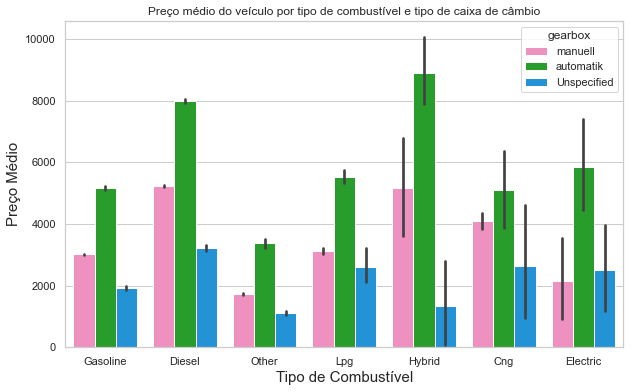

In [15]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'fuelType', y = 'price', hue = 'gearbox', data = df, palette = ['#FF81C0', '#15B01A', '#069AF3'])
plt.xlabel('Tipo de Combustível', size = 15)
plt.ylabel('Preço Médio', size = 15)
plt.title('Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio')
plt.show()

In [16]:
# Salvando o plot
fig.savefig("plots/fueltype-vehicleType-price.png")

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

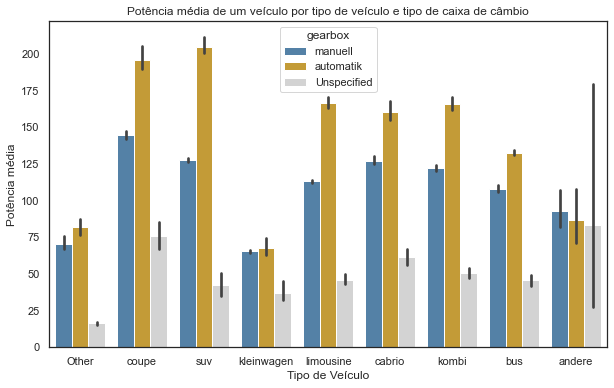

In [17]:
sns.set_theme(style = 'white')
plt.figure(figsize = (10,6))
ax2 = sns.barplot(x = 'vehicleType', y = 'powerPS', hue = 'gearbox', data = df, palette = ['steelblue', 'goldenrod', 'lightgrey'])
plt.xlabel('Tipo de Veículo')
plt.ylabel('Potência média')
plt.title('Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio')
plt.show()

In [18]:
# Salvando o plot
fig.savefig("plots/vehicletype-fueltype-power.png")

## Média de preço por marca e por veículo

In [19]:
catalog = pd.DataFrame()
for brand in list(df['brand'].unique()):
    for vehicle in list(df['vehicleType'].unique()):
        avg_price = df[(df['brand'] == brand) & (df['vehicleType'] == vehicle)]['price'].mean()
        catalog = catalog.append(pd.DataFrame({'brand': brand, 'vehicleType': vehicle, 'avgPrice': avg_price}, index = [0]))
catalog = catalog.reset_index()

del catalog["index"]
catalog["avgPrice"].fillna(0,inplace=True)
catalog["avgPrice"].isnull().value_counts()

# df2 = pd.DataFrame(df.groupby(['brand', 'vehicleType'])['price'].mean())

False    360
Name: avgPrice, dtype: int64

In [20]:
catalog["avgPrice"] = catalog["avgPrice"].astype(int)
catalog.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

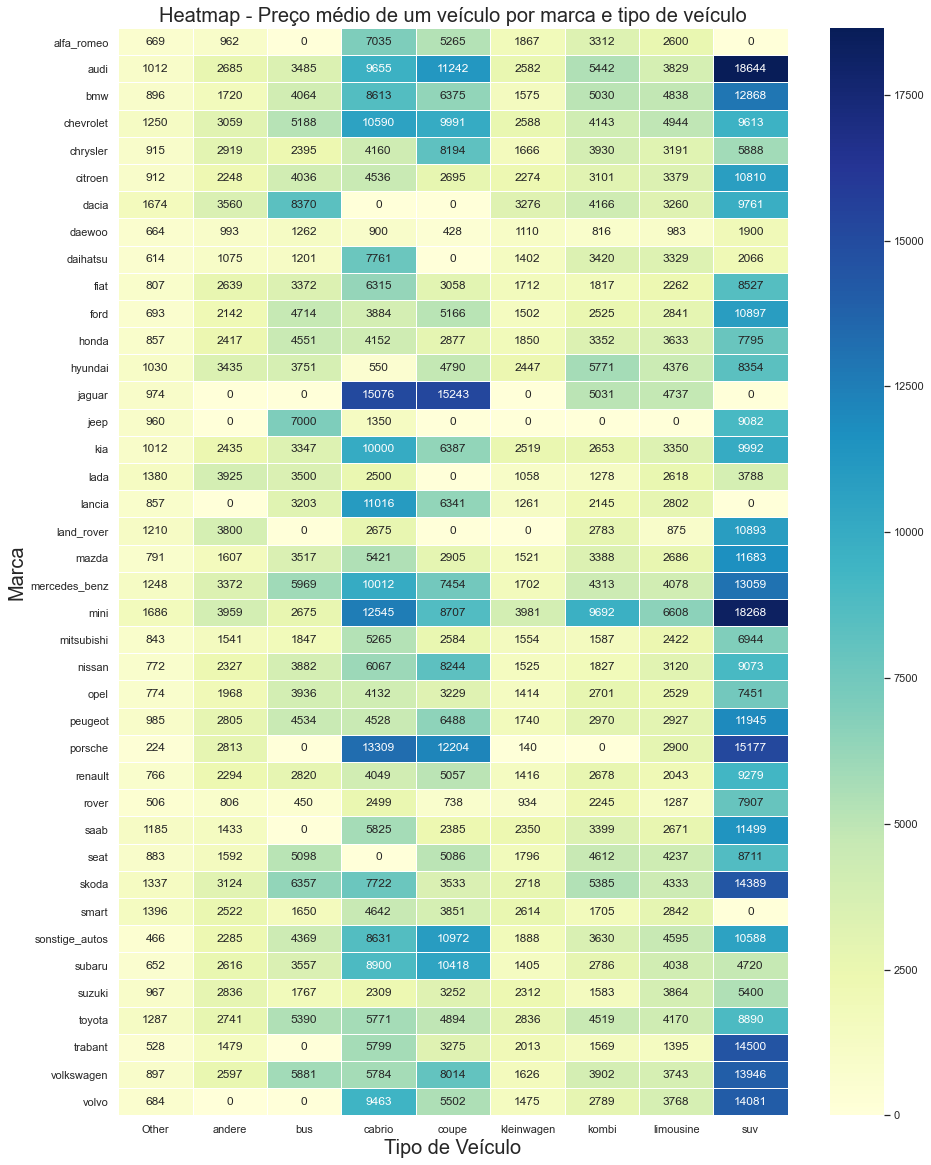

In [21]:
tri = catalog.pivot("brand", "vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize = (15, 20))
sns.heatmap(tri, linewidths = 1, cmap = "YlGnBu", annot = True, ax = ax, fmt = "d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict = {'size': 20})
ax.xaxis.set_label_text("Tipo de Veículo", fontdict = {'size': 20})
ax.yaxis.set_label_text("Marca", fontdict = {'size': 20})
plt.show()

In [22]:
# Salvando o plot
fig.savefig("plots/heatmap-price-brand-vehicleType.png")